In [7]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
data = np.loadtxt('./ex1data1.txt',delimiter=',', dtype='float32')

In [9]:
data_t = np.append(np.reshape(np.ones(len(data)),[len(data),1]), data, axis=1)
X = data_t[...,0:2]
data_x = data_t[...,1:2]
data_y = data_t[...,2:3]

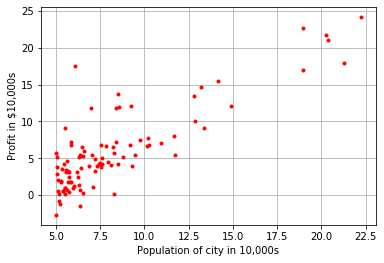

In [10]:
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid(True)
plt.plot(data_x, data_y, 'r.')

In [11]:
def costValue(x_i, y_i, theta): #计算损失函数的值
    x = np.mat(x_i)
    y = np.mat(y_i)
    cost = np.power(((x * theta)- y),2)
    return np.sum(cost)/(2*len(x))

In [12]:
def get_theta(data, a, iterator)->np.ndarray: #梯度下降求theta
    temp = np.zeros((data.shape[1]-1,1)) #创立theta 为0的向量. np.zeros((行，列))
    theta = temp
    cost = np.zeros(iterator)
    #temp theta (2 * 1)
    x_i = data[...,0:2] # (97 * 2)
    y_i = data[...,2:3] # (97 * 1)
    # 假设函数 h(x) = theta_0 + theta_1 * x
    #则 J(theta)计算如下
  
    m = x_i.shape[0]
    
    for i in range(iterator):
        for j in range(0, x_i.shape[1]):
            error = 0
            for k in range(m):
                error += (theta[0] * data[k,0] + theta[1] * data[k, 1] - data[k, 2])*data[k,j]
            temp[j] = theta[j] - (a / m) * error
        theta = temp
        
        cost[i] = costValue(x_i, y_i, theta)
                            
    return theta,cost

In [13]:
def get_theta_2(X,y, a, iterator) -> np.ndarray:  # 梯度下降求theta
    X = np.mat(X)
    temp = np.matrix(np.zeros(X.shape[1]))  # 初始化一个 θ 临时矩阵(1, 2)
    theta = temp
    cost = np.zeros(iterator)  # 初始化一个ndarray，包含每次epoch的cost
    m = X.shape[0]  # 样本数量m

    for i in range(iterator):
        # 利用向量化一步求解
        temp = theta - (a / m) * (X * theta.T - y).T * X

        theta = temp
        cost[i] = costValue(X, y, theta.T)
    return theta,cost

In [14]:
X.shape

(97, 2)

In [15]:
def NormalEquation(X,y): #正规方程求解theta

    X = np.matrix(X)
    y = np.matrix(y)
    theta = (X.T * X).I * X.T * y
    return theta

In [16]:
theta, cost= get_theta(data_t, 0.01, 1000)
theta_2, cost_2 = get_theta_2(X,data_y, 0.01, 1000)
theta_3 = NormalEquation(X,data_y)

In [17]:
theta,theta_2,theta_3

(array([[-3.25088245],
        [ 1.12836318]]),
 matrix([[-3.24140238,  1.12729424]]),
 matrix([[-3.89578118],
         [ 1.19303369]]))

In [18]:
yy = data_t[...,0:2].dot(theta)
yy_2 = data_t[...,0:2].dot(theta_2.T)
yy_3 = data_t[...,0:2].dot(theta_3)

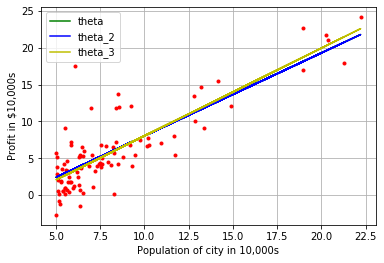

In [25]:
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid(True)
plt.plot(data_x, data_y, 'r.')
plt.plot(data_x, yy, 'g',label='theta')
plt.plot(data_x,yy_2,'b',label='theta_2')
plt.plot(data_x,yy_3, 'y', label='theta_3')
plt.legend(loc=2)

# 多变量拟合

In [26]:
def featureScaling(data):
    for col in data.columns:
        data[col] = (data[col]-data[col].min()) / (data[col].max() - data[col].min())
    return data

In [27]:
data_m = pd.read_table('./ex1data2.txt', sep=',',header=None,names=['size','num','price'])
data_m_f = featureScaling(data_m)
data_m.insert(0,'bias',np.ones(len(data_m)))
data_m_array = data_m_f.values


In [28]:
x_m = data_m_array[...,0:data_m_array.shape[1]-1]
y_m = data_m_array[...,data_m_array.shape[1]-1:data_m_array.shape[1]]
theta_m_1,cost = get_theta_2(x_m,y_m, 0.1, 1000)
theta_m_2 = NormalEquation(x_m,y_m)

In [29]:
theta_m_1,theta_m_2

(matrix([[0.029095  , 0.88642184, 0.02111417]]),
 matrix([[ 0.05578752],
         [ 0.95241114],
         [-0.06594731]]))

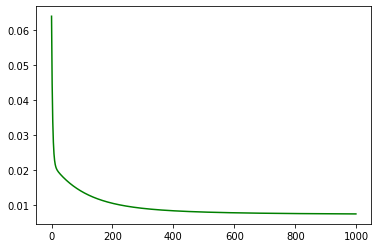

In [30]:
plt.plot(np.arange(1000),cost,'g')